# Comparison of Two Populations

Saturday 29 December 2018
@Quant_Girl

The aim of this notebook is exploring several visual tools for comparing two univariate samples. In order to illustrate each tool, we will generate three samples:

1. $\mathbf{x} = (x_1, \cdots, x_n)$ from a standard normal distribution
2. $\mathbf{y} = (y_1, \cdots, y_n)$ from a standard normal distribution
3. $\mathbf{t} = (t_1, \cdots, t_n)$ from a t-distribution wiht 2 degrees of freedom.

Then we will use each visual tool to compare:

* Two samples coming from the same distribution, i.e. (1) and (2)
* Two samples coming from different distributions, i.e. (1) and (3)


Of course there exists a formal tools (we will see two at the end of this notebook) for testing if two samples come from the same distribution. However, it is often helpful to visualise possible discrepancies between the samples.

In [1]:
# Import Packages 
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import random
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import seaborn as sns
sns.set()

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [14, 7]

In [3]:
# Generating our samples
n = 1000
np.random.seed(12345)
mu = 0
sigma = 1
x  = np.random.normal(mu, sigma, n)
y  = np.random.normal(mu, sigma, n)
t = np.random.standard_t(2, size=n)
frame = pd.DataFrame({'X':x, 'Y':y, 'T':t})
df_equal = pd.DataFrame({'X':x, 'Y':y}).melt(value_vars=['X','Y'])
df_diff = pd.DataFrame({'X':x, 'T':t}).melt(value_vars=['X','T'])

## Visual Tools

## 1. Box Plots

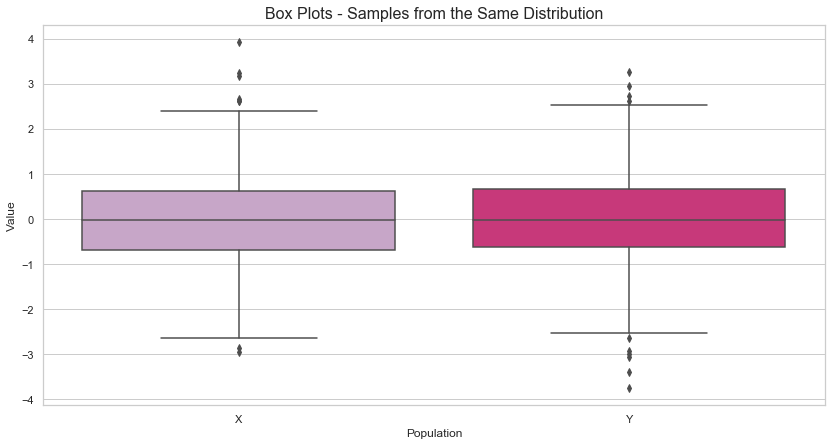

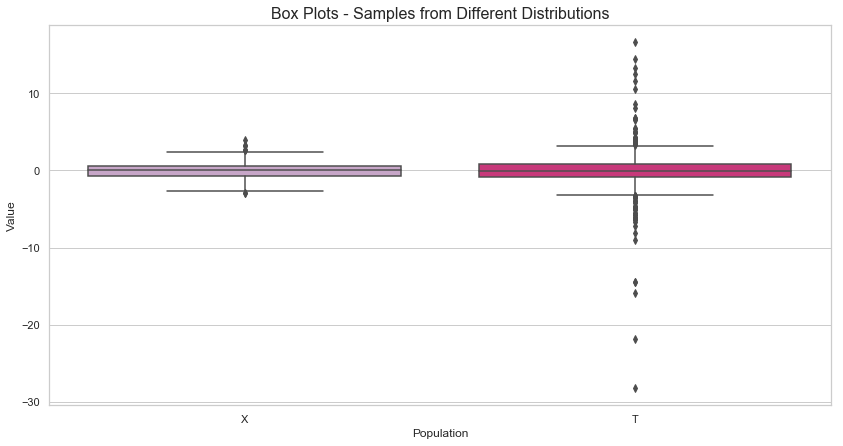

In [4]:
sns.set(style="whitegrid")
sns.boxplot(x="variable", y="value", data=df_equal, palette ="PuRd")
plt.ylabel('Value')
plt.xlabel('Population')
plt.title('Box Plots - Samples from the Same Distribution', fontsize=16)
plt.show()

sns.boxplot(x="variable", y="value", data=df_diff, palette ="PuRd")
plt.ylabel('Value')
plt.xlabel('Population')
plt.title('Box Plots - Samples from Different Distributions', fontsize=16)
plt.show()

## 2. Bee Swarm Plots

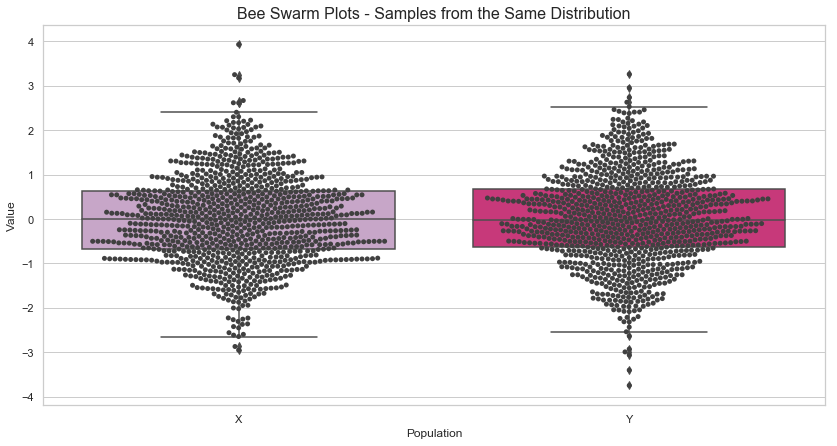

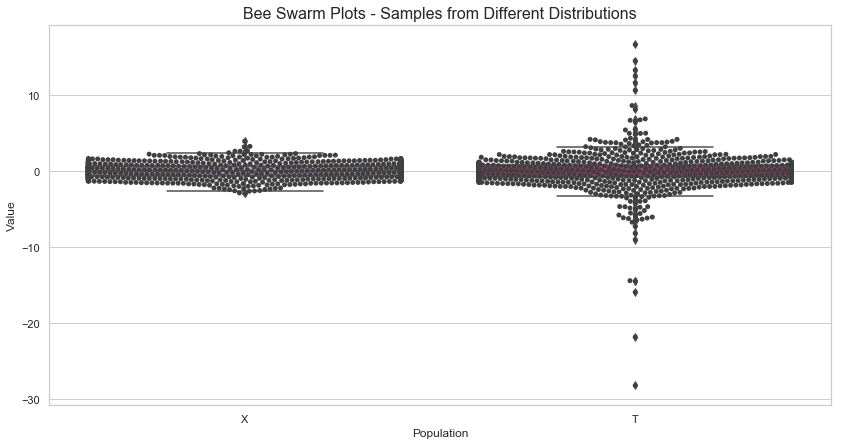

In [5]:
sns.boxplot(data=df_equal, x='variable', y ='value', palette ="PuRd")
sns.swarmplot(x="variable", y="value", data=df_equal, color='0.25')
plt.ylabel('Value')
plt.xlabel('Population')
plt.title('Bee Swarm Plots - Samples from the Same Distribution', fontsize=16)
plt.show()

sns.boxplot(data=df_diff, x='variable', y ='value', palette ="PuRd")
sns.swarmplot(data=df_diff, x="variable", y="value", color='0.25')
plt.ylabel('Value')
plt.xlabel('Population')
plt.title('Bee Swarm Plots - Samples from Different Distributions', fontsize=16)
plt.show()

## 3. Violin Plots


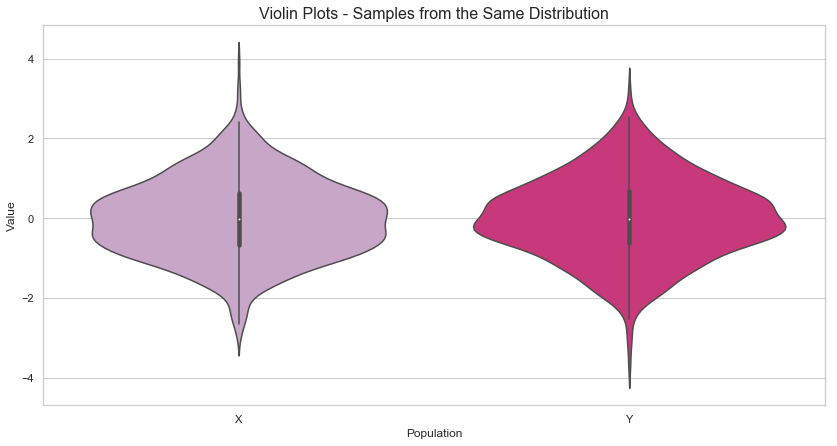

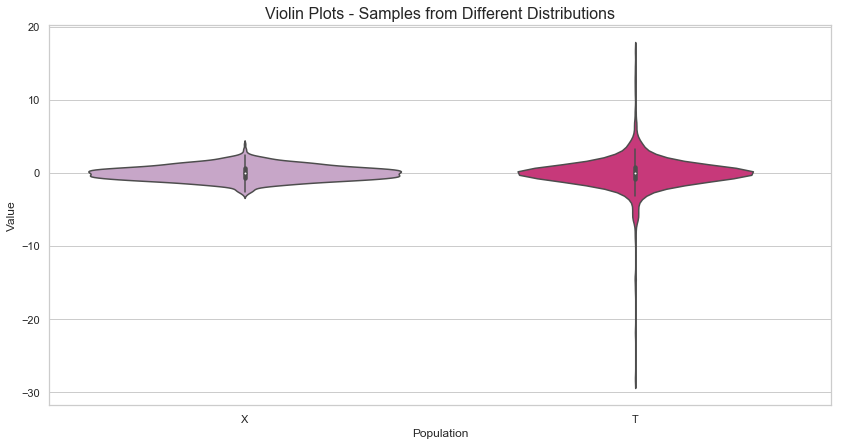

In [6]:
sns.violinplot(data =df_equal, y='value', x='variable',  palette ="PuRd")
plt.ylabel('Value')
plt.xlabel('Population')
plt.title('Violin Plots - Samples from the Same Distribution', fontsize=16)
plt.show()

sns.violinplot(data =df_diff, y='value', x='variable',  palette ="PuRd")
plt.ylabel('Value')
plt.xlabel('Population')
plt.title('Violin Plots - Samples from Different Distributions', fontsize=16)
plt.show()

## 4. Histograms

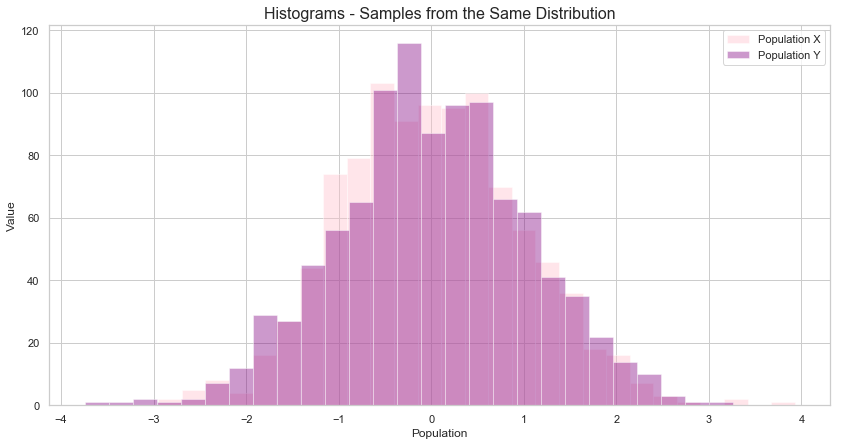

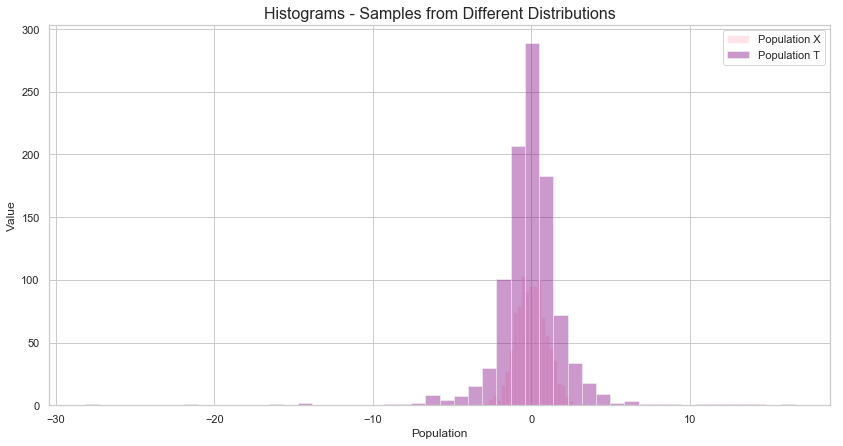

In [7]:
sns.distplot( frame["X"] , color="pink", label = "Population X", kde =False)
sns.distplot( frame["Y"] , color="purple", label = "Population Y", kde = False)
plt.ylabel('Value')
plt.xlabel('Population')
plt.title('Histograms - Samples from the Same Distribution', fontsize = 16)
plt.legend() 
plt.show()

sns.distplot( frame["X"] , color="pink", label = "Population X", kde =False)
sns.distplot( frame["T"] , color="purple", label = "Population T", kde=False)
plt.ylabel('Value')
plt.xlabel('Population')
plt.title('Histograms - Samples from Different Distributions', fontsize = 16)
plt.legend() 
plt.show()

## 5. Kernel Density Estimate

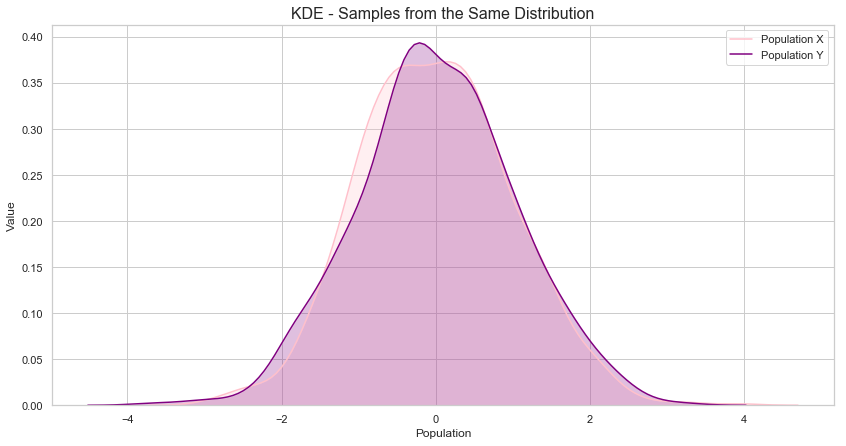

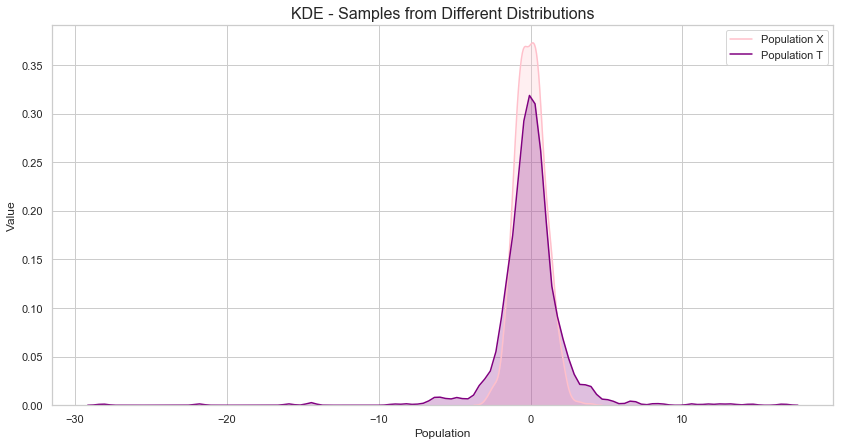

In [8]:
sns.kdeplot( frame["X"] , color="pink", shade = True, label = "Population X")
sns.kdeplot( frame["Y"] , color="purple", shade = True, label = "Population Y")
plt.ylabel('Value')
plt.xlabel('Population')
plt.title('KDE - Samples from the Same Distribution', fontsize = 16)
plt.legend() 
plt.show()

sns.kdeplot( frame["X"] , color="pink", shade = True, label = "Population X")
sns.kdeplot( frame["T"] , color="purple", shade = True, label = "Population T")
plt.ylabel('Value')
plt.xlabel('Population')
plt.title('KDE - Samples from Different Distributions', fontsize = 16)
plt.legend() 
plt.show()

### 5.1 KDE + Rug Plot

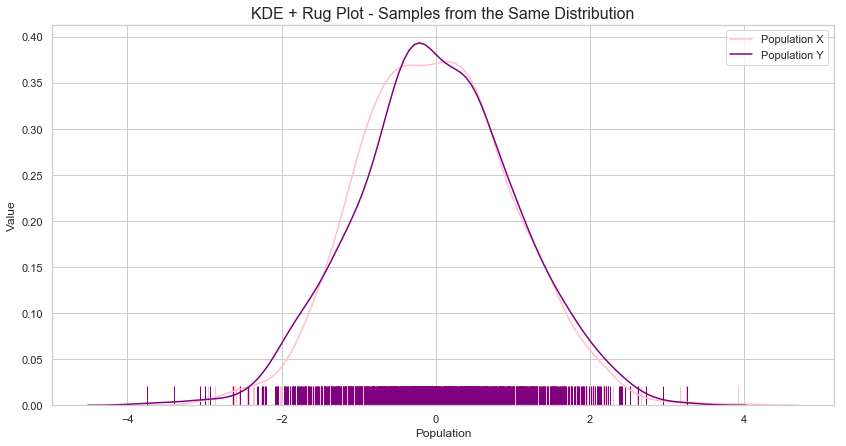

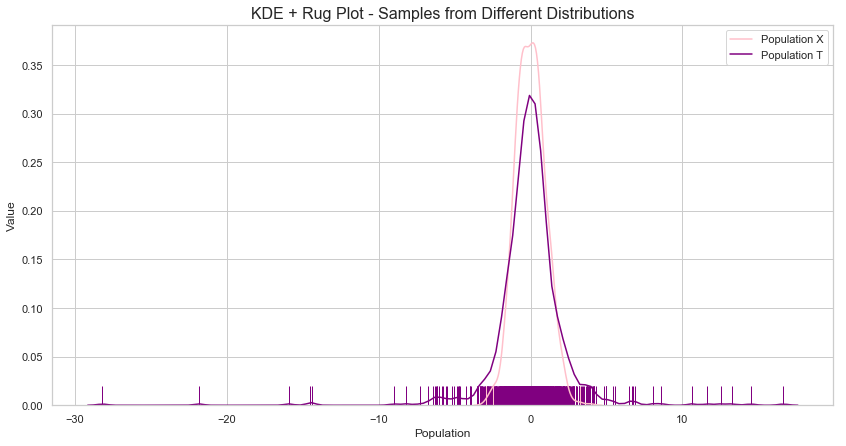

In [9]:
sns.distplot( frame["X"] , color="pink", label = "Population X", hist =False, rug =True)
sns.distplot( frame["Y"] , color="purple", label = "Population Y", hist =False, rug =True)
plt.ylabel('Value')
plt.xlabel('Population')
plt.title('KDE + Rug Plot - Samples from the Same Distribution', fontsize = 16)
plt.legend() 
plt.show()

sns.distplot( frame["X"] , color="pink", label = "Population X", hist =False, rug =True)
sns.distplot( frame["T"] , color="purple", label = "Population T", hist =False, rug =True)
plt.ylabel('Value')
plt.xlabel('Population')
plt.title('KDE + Rug Plot - Samples from Different Distributions', fontsize = 16)
plt.legend() 
plt.show()

### 5.2 KDE + Rug Plot  + Histogram

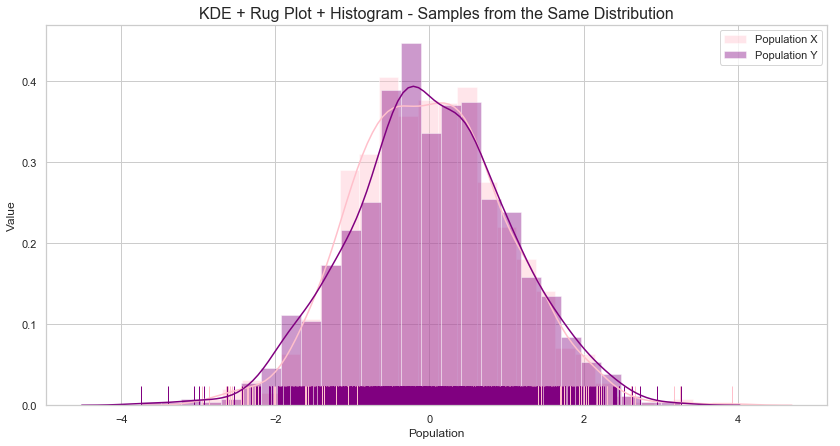

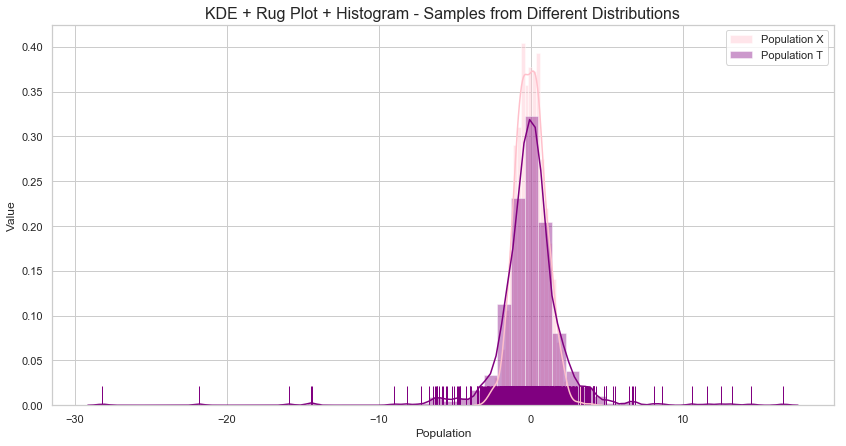

In [10]:
sns.distplot( frame["X"] , color="pink", label = "Population X", rug =True)
sns.distplot( frame["Y"] , color="purple", label = "Population Y", rug =True)
plt.ylabel('Value')
plt.xlabel('Population')
plt.title('KDE + Rug Plot + Histogram - Samples from the Same Distribution', fontsize = 16)
plt.legend() 
plt.show()

sns.distplot( frame["X"] , color="pink", label = "Population X", rug =True)
sns.distplot( frame["T"] , color="purple", label = "Population T", rug =True)
plt.ylabel('Value')
plt.xlabel('Population')
plt.title('KDE + Rug Plot + Histogram - Samples from Different Distributions', fontsize = 16)
plt.legend() 
plt.show()

## 6. Empirical ROC

In [11]:
def sens_spec(samplex, sampley, vector):
    sensitivity = []
    specificity = []
    for t in vector:
        if sum(samplex >=t)>0:
            sensitivity.append(np.mean(samplex>=t))
        else:
            sensitivity.append(float('nan'))
        if sum(sampley<t)>0:
            specificity.append(np.mean(sampley<t))
        else:
            specificity.append(float('nan'))
    return sensitivity, specificity          

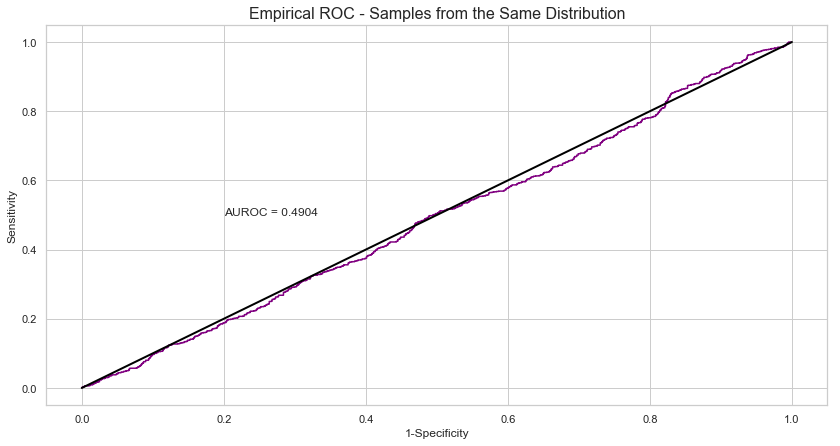

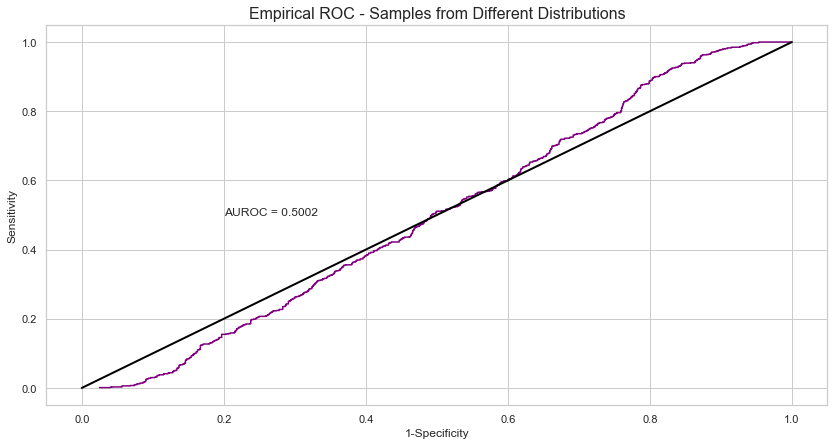

In [12]:
df_roc = pd.DataFrame({'Value': np.unique(df_equal['value'])})
df_roc = df_roc.sort_values(by = 'Value')
df_roc['Sensitivity'] , df_roc['Specificity'] = sens_spec(samplex = x, sampley = y, vector = df_roc['Value'])
df_roc['1-Specificity'] = 1 - df_roc['Specificity']

df_roc1 = df_roc.dropna()
auroc = metrics.auc(df_roc1['1-Specificity'] , df_roc1['Sensitivity'])

plt.plot('1-Specificity', 'Sensitivity', data = df_roc, color = 'purple')
plt.text(0.2, 0.5, "AUROC = "+ str(round(auroc, 4)))
plt.plot([0, 1], [0, 1], color = 'black', linewidth = 2)
plt.ylabel('Sensitivity')
plt.xlabel('1-Specificity')
plt.title('Empirical ROC - Samples from the Same Distribution', fontsize = 16)
plt.show()

df_roc = pd.DataFrame({'Value': np.unique(df_diff['value'])})
df_roc = df_roc.sort_values(by = 'Value')
df_roc['Sensitivity'] , df_roc['Specificity'] = sens_spec(samplex = x, sampley = t, vector = df_roc['Value'])
df_roc['1-Specificity'] = 1 - df_roc['Specificity']

df_roc1 = df_roc.dropna()
auroc = metrics.auc(df_roc1['1-Specificity'] , df_roc1['Sensitivity'])

plt.plot('1-Specificity', 'Sensitivity', data = df_roc, color = 'purple')
plt.text(0.2, 0.5, "AUROC = "+ str(round(auroc,4)))
plt.plot([0, 1], [0, 1], color = 'black', linewidth = 2)
plt.ylabel('Sensitivity')
plt.xlabel('1-Specificity')
plt.title('Empirical ROC - Samples from Different Distributions', fontsize = 16)
plt.show()

## 7. Empirical Cumulative Distribution Function 

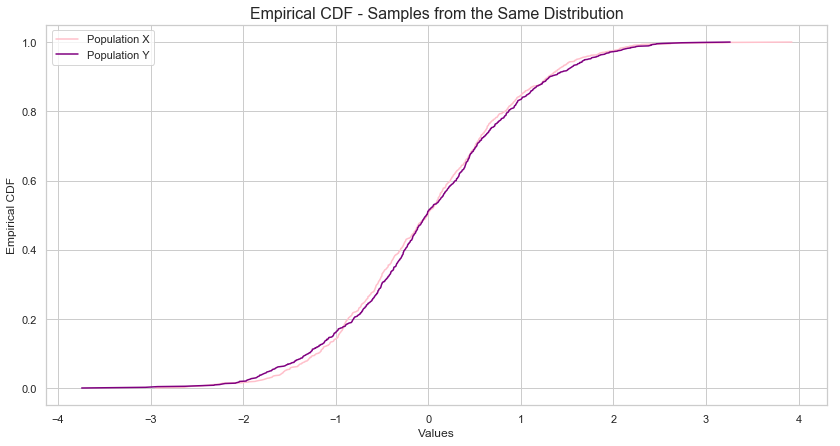

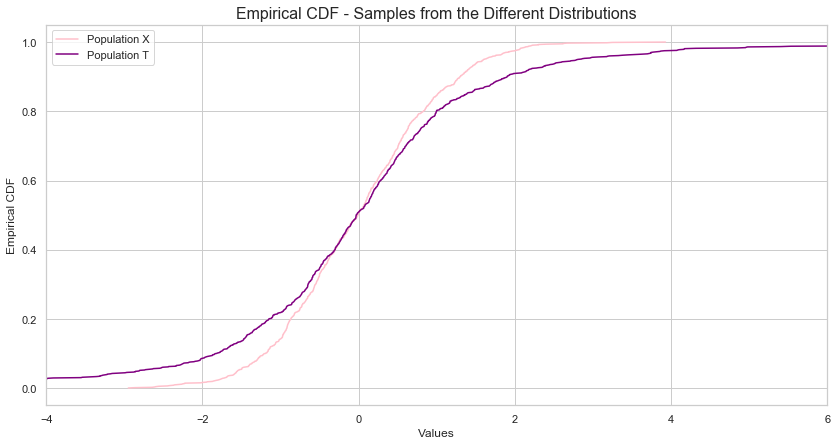

In [13]:
plt.plot(np.sort(x), np.arange(1,len(x)+1)/float(len(x)), color="pink", label = "Population X")
plt.plot(np.sort(y), np.arange(1,len(y)+1)/float(len(y)), color="purple", label = "Population Y")
plt.ylabel('Empirical CDF')
plt.xlabel('Values')
plt.title('Empirical CDF - Samples from the Same Distribution', fontsize = 16)
plt.legend() 
plt.show()
plt.plot(np.sort(x), np.arange(1,len(x)+1)/float(len(x)), color="pink", label = "Population X")
plt.plot(np.sort(t), np.arange(1,len(t)+1)/float(len(t)), color="purple", label = "Population T")
plt.xlim(-4, 6)
plt.ylabel('Empirical CDF')
plt.xlabel('Values')
plt.title('Empirical CDF - Samples from the Different Distributions', fontsize = 16)
plt.legend() 
plt.show()

## Hypothesis Tests

## 1. Kolmogorov-Smirnov

The Kolmogorov Smirnov test is a nonparametric test of the equality of **continuous, one-dimensional probability distributions** that can be used to compare two samples. It is named after Andrey Kolmogorov and Nikolai Smirnov and  quantifies a distance between the CDFSof the samples.

In [14]:
stats.ks_2samp(x, y)

Ks_2sampResult(statistic=0.033999999999999975, pvalue=0.6028025867269045)

As we expected there is no evidence to reject the hypothesis that $\mathbf{x}$ and $\mathbf{y}$ come from the same population.

In [15]:
stats.ks_2samp(x, t)

Ks_2sampResult(statistic=0.09400000000000001, pvalue=0.0002633953738135108)

In this case, we reject the hypothesis that $\mathbf{x}$ and $\mathbf{t}$ come from the same population. This results is once again expected since we know they come from different distributions.

## 2. Anderson-Darling

This tests like the Kolmogorov-Smirnov test is a nonparametric test of the equality of **continuous, one-dimensional probability distributions** that can be used to compare two samples.

In [16]:
warnings.filterwarnings("ignore", category=UserWarning)
stats.anderson_ksamp([x,y])

Anderson_ksampResult(statistic=-0.09312441293276834, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=0.3836257626029933)

Once again, as expected, there is no evidence to reject the hypothesis that $\mathbf{x}$ and $\mathbf{y}$ come from the same population.

In [17]:
stats.anderson_ksamp([x,t])

Anderson_ksampResult(statistic=16.56336490320586, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=1.1823482960072201e-05)

Finally, we reject the hypothesis that $\mathbf{x}$ and $\mathbf{t}$ come from the same population. This results is once again expected since we know they come from different distributions.